In [1]:
import os
import pandas
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
ffmpegpath = os.path.abspath("C:/ffmpeg/bin/ffmpeg.exe")
plt.rcParams["animation.ffmpeg_path"] = ffmpegpath
print(animation.FFMpegWriter.bin_path())
print(animation.FFMpegWriter.isAvailable())
import numpy as np
import seaborn as sns

athlete_events = pandas.read_csv('./athlete_events.csv')
plt.style.use('ggplot')

C:\ffmpeg\bin\ffmpeg.exe
True


In [2]:
athlete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


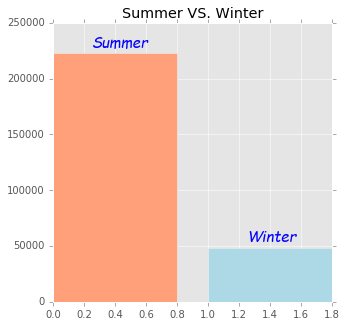

In [3]:
# Background
num_summer = sum(athlete_events['Season'] == 'Summer')
num_winter = sum(athlete_events['Season'] == 'Winter')
plt.figure(figsize = (5, 5))
plt.bar(range(2), [num_summer, num_winter], color = ['lightsalmon', 'lightblue'])
plt.text(0.25, num_summer + 5000, 'Summer', size = 15, family = "fantasy", color = "blue", style = "italic")
plt.text(1.25, num_winter + 5000, 'Winter', size = 15, family = "fantasy", color = "blue", style = "italic")
plt.title('Summer VS. Winter')
plt.show()

[ 48564.] [ 222552.] 271116


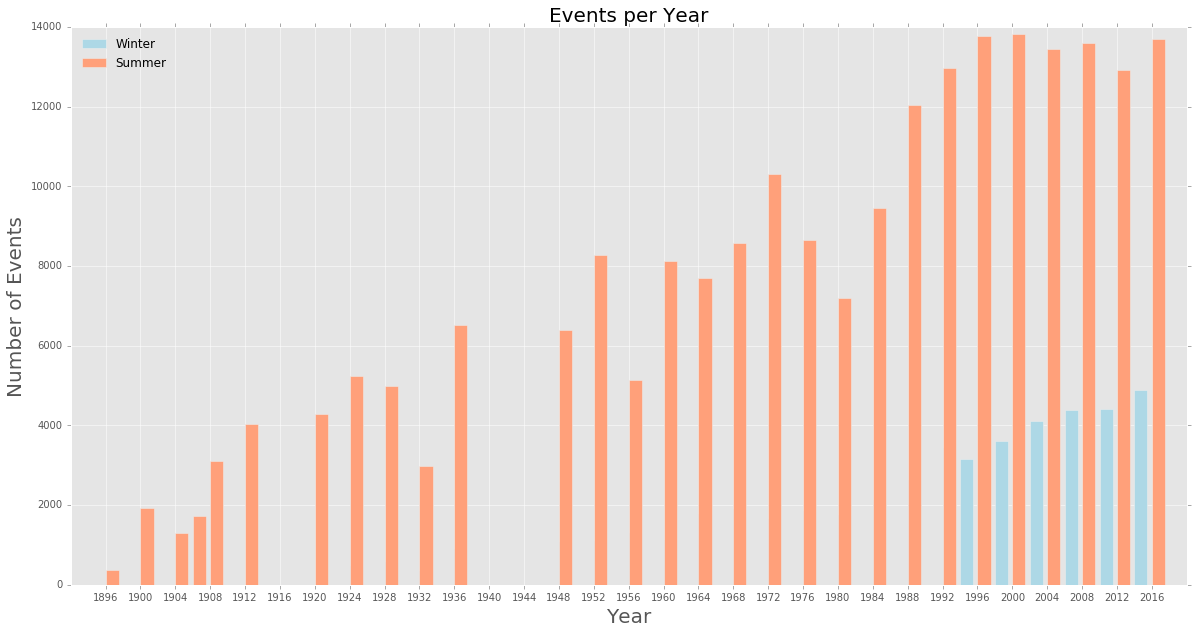

In [15]:
# What's the number of events each year?
%matplotlib inline
events_per_year_win = {}
events_per_year_sum = {}
events_counter_win = np.zeros((120//2 + 1, 1))
events_counter_sum = np.zeros((120//2 + 1, 1))
for i in range(120//2 + 1):
    year = 1896 + i * 2
    events_per_year_win[str(year)] = len(set(np.where(athlete_events['Year'] == year)[0]) \
                                     .intersection(set(np.where(athlete_events['Season'] == 'Winter')[0])))
    events_counter_win[i] = events_per_year_win[str(year)]
    events_per_year_sum[str(year)] = len(set(np.where(athlete_events['Year'] == year)[0]) \
                                     .intersection(set(np.where(athlete_events['Season'] == 'Summer')[0])))
    events_counter_sum[i] = events_per_year_sum[str(year)]
print(sum(events_counter_win), sum(events_counter_sum), len(athlete_events))

plt.figure(figsize = (20, 10))
plt.bar([1896 + 2*i for i in range(120//2 + 1)], events_counter_win, 1.5, color = 'lightblue', label = 'Winter')
plt.bar([1896 + 2*i for i in range(120//2 + 1)], events_counter_sum, 1.5, color = 'lightsalmon', label='Summer')
plt.xlim(1892, 2020)
plt.xticks([1896 + 4*i for i in range(120//4 + 1)])
plt.legend(loc='upper left', frameon=False)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Events', fontsize=20)
plt.title('Events per Year', fontsize=20)
plt.show()

13821


<IPython.core.display.Javascript object>


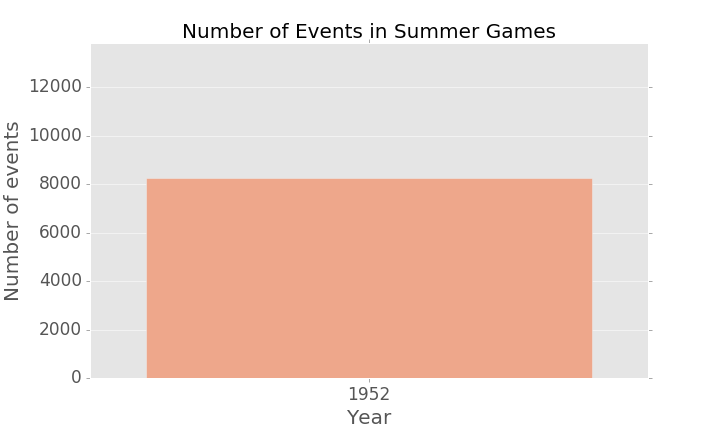

In [62]:
# GIF Version
%matplotlib notebook
title = 'Number of events'
numbers = []
years = []
for k,v in events_per_year_sum.items():
    if v != 0:
        numbers.append(v)
        years.append(int(k))
numbers = np.array(numbers).reshape(-1, 1)
#years = np.array(years).reshape(-1, 1)
#events_summer = pandas.DataFrame(events_counter_sum, [1896 + 2*i for i in range(61)])
events_summer = pandas.DataFrame(numbers, years)
events_summer.columns = {title}

writer = animation.FFMpegWriter(fps=2, metadata=None, bitrate=1800)
#writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)

#fig1 = plt.figure(figsize=(10,6))
#plt.xlim(1892, 2018)
#plt.ylim(np.min(events_summer)[0], np.max(events_summer)[0])
#plt.xlabel('Year', fontsize=20)
#plt.ylabel(title, fontsize=20)
#plt.title('Number of events in summer games', fontsize=20)
#def animate(i):
#    data = events_summer.iloc[:i+1]
#    p = sns.lineplot(x=data.index, y=data[title], data=data, color = 'r')
#    p.tick_params(labelsize=17)
#    plt.setp(p.lines, linewidth=7)
#ani = animation.FuncAnimation(fig1, animate, frames=len(numbers), repeat=True)
#plt.show()
#ani.save('events in summer games.mp4', writer=writer)


ymax = np.max(events_summer)[0]
print(ymax)
fig2 = plt.figure(figsize=(10,6))
#plt.xlim(0, 4)
#plt.ylim(0, ymax)
def animate1(i):
    plt.cla()
    plt.xlim(0, 4)
    plt.ylim(0, ymax)
    plt.xlabel('Year', fontsize=20)
    plt.ylabel('number of events', fontsize=20)
    plt.title('Number of Events in Summer Games', fontsize=20)
    data = events_summer.iloc[int(i):int(i+1)]
    p = sns.barplot(x=data.index, y=data[title], data=data, errwidth = 2, color = 'lightsalmon')
    p.tick_params(labelsize=17)
ani1 = animation.FuncAnimation(fig2, animate1, frames=29, repeat=True)
plt.show()
ani1.save('changes of number of events in summer.mp4', writer=writer)

<IPython.core.display.Javascript object>


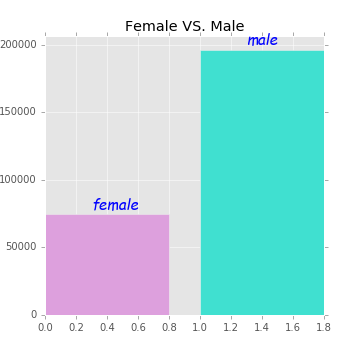

In [64]:
# Changes of gender ratio
female_ID = np.array(np.where(athlete_events['Sex'] == 'F'))
female_ID = np.reshape(female_ID, (len(female_ID[0]), 1))
male_ID = np.array(np.where(athlete_events['Sex'] == 'M'))
male_ID = np.reshape(male_ID, (len(male_ID[0]), 1))
plt.figure(figsize = (5, 5))
plt.ylim([0, max(len(female_ID), len(male_ID)) + 10000])
plt.bar(range(2), [len(female_ID), len(male_ID)], color = ['plum', 'turquoise'])
plt.text(0.3, len(female_ID) + 3000, 'female', size = 15, family = "fantasy", color = "blue", style = "italic")
plt.text(1.3, len(male_ID) + 3000, 'male', size = 15, family = "fantasy", color = "blue", style = "italic")
plt.title('Female VS. Male')
plt.show()

29


<IPython.core.display.Javascript object>


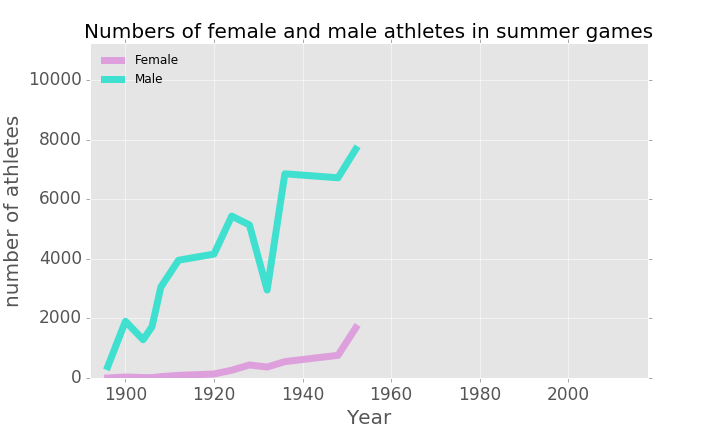

In [67]:
# GIF Version
%matplotlib notebook
title = 'number of athletes'
years = []
for k,v in events_per_year_sum.items():
    if v != 0:
        years.append(int(k))
counter_f = []
counter_m = []
print(len(years))
for i in range(len(years)):
    counter_f.append(len(set(np.where(athlete_events['Sex'] == 'F')[0]). \
                         intersection(set(np.where(athlete_events['Year'] == years[i])[0]))))
    counter_m.append(len(set(np.where(athlete_events['Sex'] == 'M')[0]). \
                         intersection(set(np.where(athlete_events['Year'] == years[i])[0]))))
counter_f = np.array(counter_f).reshape(-1, 1)
num_female = pandas.DataFrame(counter_f, years)
num_female.columns = {title}
counter_m = np.array(counter_m).reshape(-1, 1)
num_male = pandas.DataFrame(counter_m, years)
num_male.columns = {title}


writer = animation.FFMpegWriter(fps=2, metadata=None, bitrate=1800)

fig1 = plt.figure(figsize=(10,6))
def animate_gender1(i):
    plt.cla()
    plt.xlim(1892, 2018)
    plt.ylim([0, np.max([np.max(counter_f), np.max(counter_m)])])
    plt.xlabel('Year', fontsize=20)
    plt.ylabel(title, fontsize=20)
    plt.title('Numbers of female and male athletes in summer games', fontsize=20)
    data_f = num_female.iloc[:i+1]
    data_m = num_male.iloc[:i+1]
    p1 = sns.lineplot(x=data_f.index, y=data_f[title], data=data_f, color = 'plum', label='Female')
    p2 = sns.lineplot(x=data_m.index, y=data_m[title], data=data_m, color = 'turquoise', label='Male')
    p1.tick_params(labelsize=17)
    p2.tick_params(labelsize=17)
    plt.setp(p1.lines, linewidth=7)
    plt.setp(p2.lines, linewidth=7)
    plt.legend(loc='upper left',frameon=False)
ani1 = animation.FuncAnimation(fig1, animate_gender1, frames=len(years), repeat=True)
plt.show()
ani1.save('Gender Numbers Inequality_line plot.mp4', writer=writer)

13235
29 29


<IPython.core.display.Javascript object>


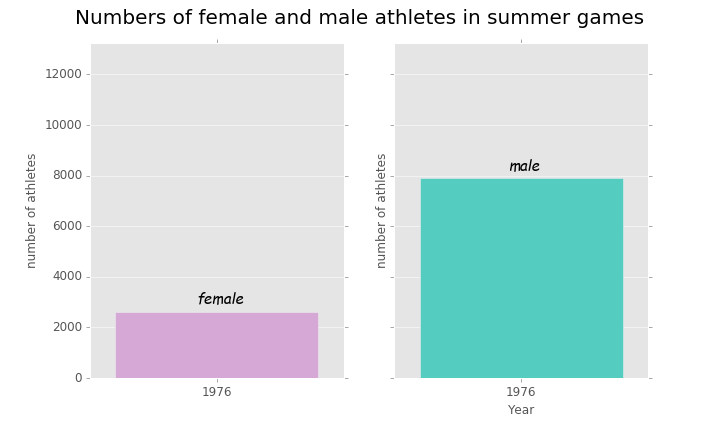

In [68]:
ymax = np.max([np.max(counter_f), np.max(counter_m)]) + 2000
print(ymax)
print(len(counter_f), len(counter_m))
fig2, axes = plt.subplots(1, 2, sharey=True, figsize=(10,6))
def animate_gender2(i):
    axes[0].cla()
    axes[1].cla()
    plt.ylim(0, ymax)
    
    data_f = num_female.iloc[int(i):int(i+1)]
    data_m = num_male.iloc[int(i):int(i+1)]
    p1 = sns.barplot(x=data_f.index, y=data_f[title], data=data_f, ax=axes[0], errwidth=0.5, color='plum')
    p1.tick_params(labelsize=12)
    p2 = sns.barplot(x=data_m.index, y=data_m[title], data=data_m, ax=axes[1], errwidth=0.5, color='turquoise')
    p2.tick_params(labelsize=12)
    
    axes[0].label_outer()
    axes[1].label_outer()
    plt.xlabel('Year')
    axes[0].text(-0.08, data_f[title] + 300, 'female', size = 15, family = "fantasy", color = "black", style = "italic")
    axes[1].text(-0.05, data_m[title] + 300, 'male', size = 15, family = "fantasy", color = "black", style = "italic")
    fig2.subplots_adjust(hspace=2)
    fig2.suptitle('Numbers of female and male athletes in summer games', fontsize=20)
writer = animation.FFMpegWriter(fps=2, metadata=None, bitrate=1800)
ani2 = animation.FuncAnimation(fig2, animate_gender2, frames=len(years), repeat=True)
plt.show()
ani2.save('Gender Numbers Inequality_bar plot.mp4', writer=writer)

<IPython.core.display.Javascript object>


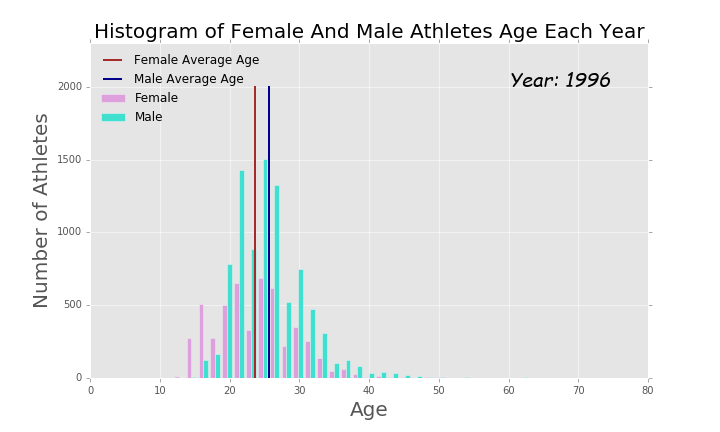

c:\users\cr\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\cr\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
# Ages
%matplotlib notebook

years = []
for k,v in events_per_year_sum.items():
    if v != 0:
        years.append(int(k))

age = athlete_events[~np.isnan(athlete_events.Age)]
age_female = age[age.Sex == 'F']
age_male = age[age.Sex == 'M']



writer = animation.FFMpegWriter(fps=2, metadata=None, bitrate=1800)
fig1 = plt.figure(figsize=(10,6))
def animate_age_hist(i):
    plt.cla()
    plt.xlim(0, 80)
    plt.ylim(0, 2300)
    plt.xlabel('Age', fontsize=20)
    plt.ylabel('Number of Athletes', fontsize=20)
    plt.title('Histogram of Female And Male Athletes Age Each Year', fontsize=20)
    
   
    #p2 = sns.distplot(age_female[age_female.Year == years[i]]['Age'], color = 'turquoise', label='Male')
    #p1 = sns.distplot(age_male[age_male.Year == years[i]]['Age'], color = 'plum', label='Female')
    data_f = list(age_female[age_female.Year == years[i]]['Age'].values)
    data_m = list(age_male[age_male.Year == years[i]]['Age'].values)
    plt.hist([data_f, data_m], bins = 30, normed=False, 
             color=['plum', 'turquoise'], label=['Female', 'Male'])
    mean_f = np.mean(data_f)
    mean_m = np.mean(data_m)
    plt.plot([mean_f, mean_f], [0, 2000], color = 'brown', linewidth = 2, label='Female Average Age')
    plt.plot([mean_m, mean_m], [0, 2000], color = 'darkblue', linewidth = 2, label='Male Average Age')
    plt.text(60, 2000, 'Year: ' + str(years[i]), size = 20, family = "fantasy", color = "Black", style = "italic")
    plt.legend(loc='upper left',frameon=False)
ani1 = animation.FuncAnimation(fig1, animate_age_hist, frames=len(years), repeat=True)
plt.show()
ani1.save('Histogram of Female And Male Athletes Age Each Year.mp4', writer=writer)


<IPython.core.display.Javascript object>


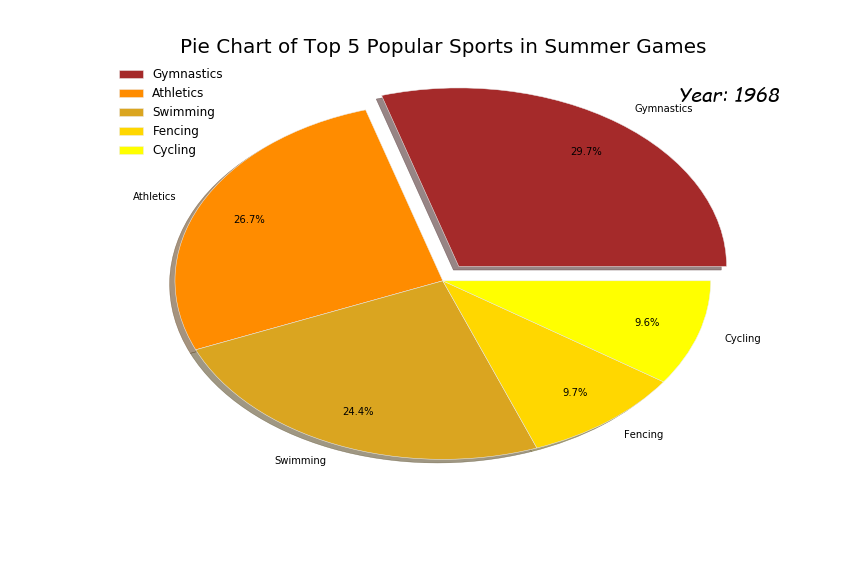

In [6]:
# Sports in summer
%matplotlib notebook

years = []
for k,v in events_per_year_sum.items():
    if v != 0:
        years.append(int(k))

sports = athlete_events[athlete_events.Sport != None]
sports_type = []
for item in sports['Sport'].values:
    if item not in sports_type:
        sports_type.append(item)
sports_color = ['brown', 'darkorange', 'goldenrod', 'gold', 'yellow']

writer = animation.FFMpegWriter(fps=2, metadata=None, bitrate=1800)
fig1 = plt.figure(figsize=(12,8))
def animate_sports_pie(i):
    plt.cla()
    #plt.xlim(0, 80)
    #plt.ylim(0, 2300)
    #plt.xlabel('A', fontsize=20)
    #plt.ylabel('Number of Athletes', fontsize=20)
    plt.title('Pie Chart of Top 5 Popular Sports in Summer Games', fontsize=20)
    
    data = sports[sports.Year == years[i]]
    counter = []

    for s in sports_type:
        counter.append(len(data[data.Sport == s]))
    counter = np.array(counter)
    
    num = []
    labels = []
    while len(labels) < 5:
        topk = list(np.where(counter == max(counter)))
        for k in topk:
            labels.append(sports_type[int(k)])
            num.append(max(counter))
        counter[topk] = 0
    while len(labels) > 5:
        labels.pop()
        num.pop()

    plt.pie(num, explode=[0.1,0,0,0,0], colors=sports_color, labels=labels, autopct='%1.1f%%',pctdistance=0.8, shadow=True)
    plt.text(0.88, 1.0, 'Year: ' + str(years[i]), size = 20, family = "fantasy", color = "Black", style = "italic")
    plt.legend(loc='upper left',frameon=False)
ani1 = animation.FuncAnimation(fig1, animate_sports_pie, frames=len(years), repeat=True)
plt.show()
ani1.save('Pie Chart of Top 5 Popular Sports in Summer Games.mp4', writer=writer)

<IPython.core.display.Javascript object>


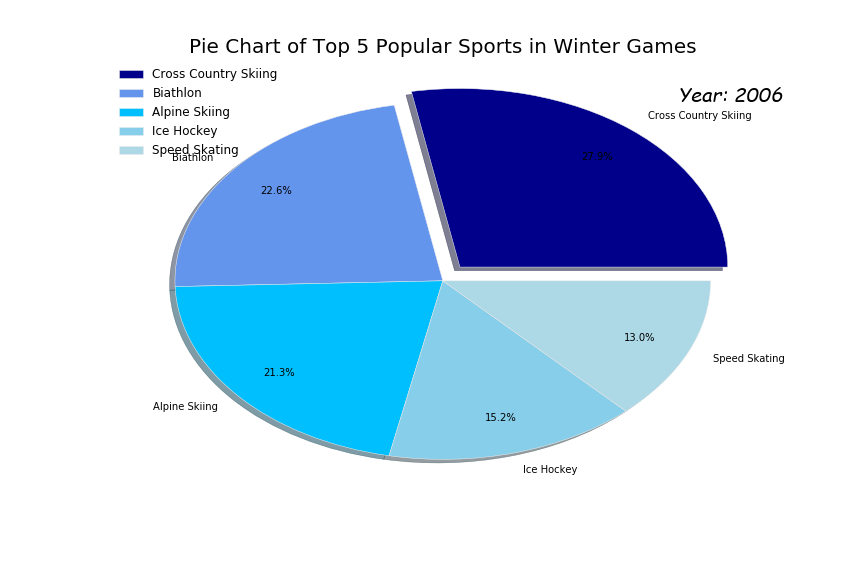

In [7]:
# Sports in winter
%matplotlib notebook

years = [1994, 1998, 2002, 2006, 2010, 2014]

sports = athlete_events[athlete_events.Sport != None]
sports_type = []
for item in sports['Sport'].values:
    if item not in sports_type:
        sports_type.append(item)
sports_color = ['darkblue', 'cornflowerblue', 'deepskyblue', 'skyblue', 'lightblue']

writer = animation.FFMpegWriter(fps=2, metadata=None, bitrate=1800)
fig1 = plt.figure(figsize=(12,8))
def animate_sports_pie(i):
    plt.cla()
    plt.title('Pie Chart of Top 5 Popular Sports in Winter Games', fontsize=20)
    
    data = sports[sports.Year == years[i]]
    counter = []

    for s in sports_type:
        counter.append(len(data[data.Sport == s]))
    counter = np.array(counter)
    
    num = []
    labels = []
    while len(labels) < 5:
        topk = list(np.where(counter == max(counter)))
        for k in topk:
            labels.append(sports_type[int(k)])
            num.append(max(counter))
        counter[topk] = 0
    while len(labels) > 5:
        labels.pop()
        num.pop()

    plt.pie(num, explode=[0.1,0,0,0,0], colors=sports_color, labels=labels, autopct='%1.1f%%',pctdistance=0.8, shadow=True)
    plt.text(0.88, 1.0, 'Year: ' + str(years[i]), size = 20, family = "fantasy", color = "Black", style = "italic")
    plt.legend(loc='upper left',frameon=False)
ani1 = animation.FuncAnimation(fig1, animate_sports_pie, frames=len(years), repeat=True)
plt.show()
ani1.save('Pie Chart of Top 5 Popular Sports in Winter Games.mp4', writer=writer)

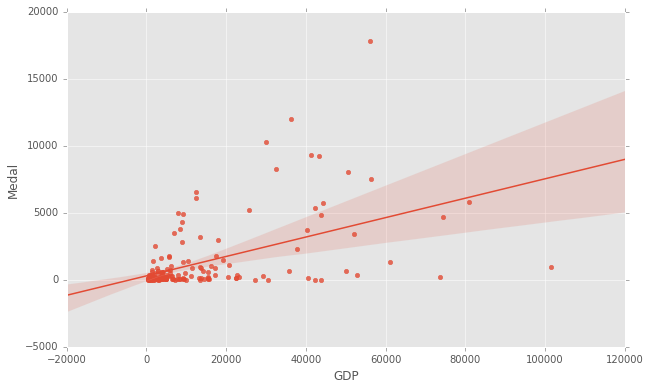

In [9]:
%matplotlib inline
country_info = pandas.read_csv('./dictionary.csv')
country = country_info['Country'].values
population = country_info['Population'].values
GDP = country_info['GDP per Capita'].values
Medal_info = athlete_events[athlete_events.Medal != 'NaN']
num_medal = []
for c in country:
    num_medal.append(len(Medal_info[athlete_events.Team == c]))
    

df_GDP = pandas.DataFrame({'GDP':GDP, 'Population': population, 'Medal': num_medal}, index=country)
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP', y='Medal', data=df_GDP)

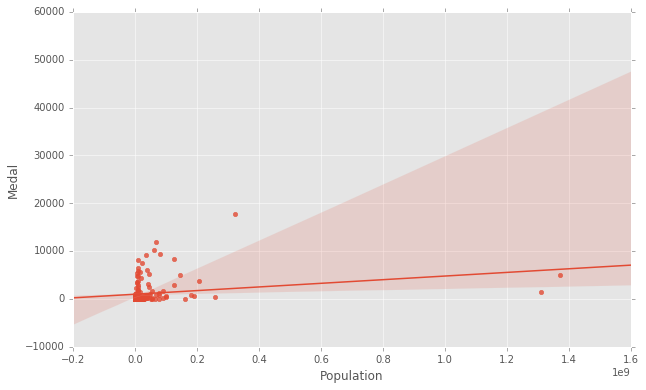

In [10]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Population', y='Medal', data=df_GDP)

In [11]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

df_GDP = df_GDP[~np.isnan(df_GDP.GDP)][~np.isnan(df_GDP.Population)]
feature_cols = ['GDP', 'Population']
X = df_GDP[feature_cols]
y = df_GDP['Medal']
reg = linreg.fit(X, y)
print(reg.intercept_, reg.coef_)

114.878991719 [  7.39037117e-02   4.04728127e-06]


c:\users\cr\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


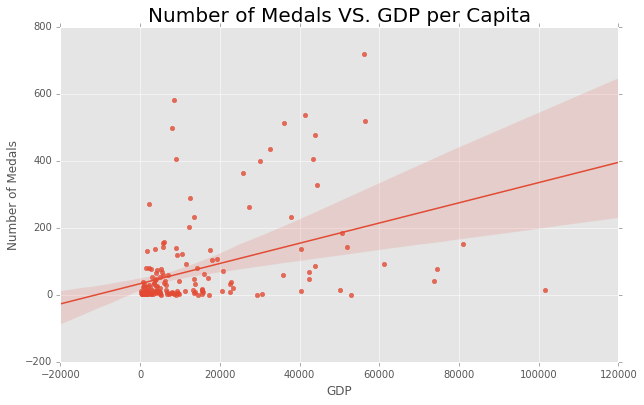

In [14]:
country_code = country_info['Code'].values
Medal_2016 = pandas.read_csv('./2016_country_sport_og.csv')
num_medal_2016 = []
for c in country_code:
    num_medal_2016.append(sum(Medal_2016[Medal_2016.NOC == c]['count'].values))
    
df_GDP2016 = pandas.DataFrame({'GDP':GDP, 'Population': population, 'Number of Medals': num_medal_2016}, index=country_code)
plt.figure(figsize=(10, 6))
sns.regplot(x='GDP', y='Number of Medals', data=df_GDP2016)
plt.title('Number of Medals VS. GDP per Capita', fontsize=20)